In [1]:
%pip install pandas numpy matplotlib plotly seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df['sex'].replace('male', 0, inplace=True)
df['sex'].replace('female', 1, inplace=True)
df['sex'] = df['sex'].astype('int64')

In [5]:
df['smoker'].replace('no', 0, inplace=True)
df['smoker'].replace('yes', 1, inplace=True)
df['smoker'] = df['smoker'].astype('int64')

In [6]:
region_cols = pd.get_dummies(df['region'])
region_cols.head()

,northeast,northwest,southeast,southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False


In [7]:
region_cols.replace('False', 0, inplace=True)
region_cols.replace('True', 1, inplace=True)
region_cols = region_cols.astype('int64')

region_cols.replace('False', 0, inplace=True)
region_cols.replace('True', 1, inplace=True)
region_cols = region_cols.astype('int64')

region_cols.replace('False', 0, inplace=True)
region_cols.replace('True', 1, inplace=True)
region_cols = region_cols.astype('int64')

region_cols.replace('False', 0, inplace=True)
region_cols.replace('True', 1, inplace=True)
region_cols = region_cols.astype('int64')

In [8]:
X = pd.concat([df[['age', 'sex', 'bmi', 'children', 'smoker']], region_cols], axis = 1)
X.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


In [9]:
y = df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [11]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

In [12]:
def gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations, 1))
    
    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)
    
    return cost_track, params

In [13]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

In [14]:
track, weights = gradient_descent(X_train, y_train, 0.0003, 100000)

print(weights)

y_pred = predict(X_test, weights)
r2_score(y_test, y_pred)

[-8457.61048528   259.62243413   313.97821384   269.25417278
   384.77806982 24384.52424933 -1565.45641494 -1769.63623307
 -2489.99861367 -2632.32158722]


0.7144298200157657

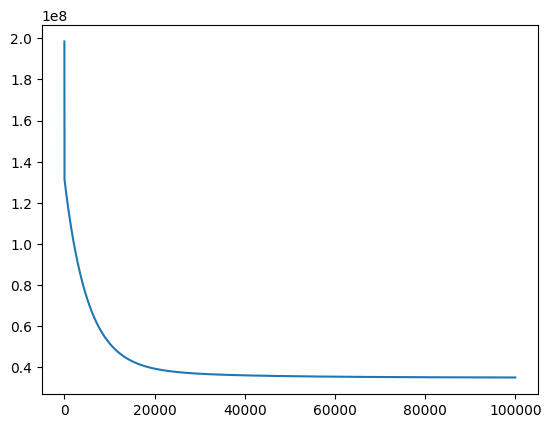

In [15]:

plt.plot(track)